**Julia Workshop: Compute the future** (23/11/2023)<br>
Author: Robbe Ceulemans

#  Getting started with julia

## Topics:
1. Variables & types
2. Functions & methods
3. Array syntax
4. Control flow

## 1. Variables & types

### a. Assigning variables
Similar to dynamic programming languages like Python and Matlab variables can be declared by simply using the `=` sign.

In [ ]:
x=2.0

The type of the variable is inferred automatically at run time (dynamic).

In [ ]:
typeof(x)

Variables can be reused. A new value can be assigned to the variable

In [ ]:
x=4.0

that does not necessarily have to be of the same type. The type is in this case not fixed.

In [22]:
x=2+3im; typeof(x)

Complex{Int64}

<div class="alert alert-block alert-success">
<b>Exercise:</b> Create the following three variables. What are there types?<br>
    1. Variable $\alpha$ with value <code>true</code><br>
    2. Variable $\beta$ with value 1//2<br>
    3. Variable $\gamma$ with value 1f0+im*2f0<br>
    <b>Hint:</b> Use LateX notation + tab
</div>

In [25]:
α=true; typeof(α)

Bool

In [26]:
β=1//2; typeof(β)

Rational{Int64}

In [27]:
γ=1f0+im*2f0; typeof(γ)

ComplexF32 (alias for Complex{Float32})

Julia knows many types, that are structured in a hierarchy. Every object has a type. As an example the numeric types are shown here:



### b. Variable names
The system for naming variables in Julia is extremely flexible. It's case-sensitive, supports Latex symbol names (in many editing environments) and even includes emoticons. For Latex symbols, type a backslash in front *\pi* and hit tab.

In [ ]:
# pizza emoji = \:pizza: + tab
🍕="It's time for pizza!!"
print(🍕)
typeof(🍕)

Popular constants are also built in

In [ ]:
2π

Notice here that multiplication by a number is allowed without the `*` if followed by a variable. Variable names can therefore never start with a number.<br>
Constants can even be redefined, but only when the built in constant has not been used before.

In [ ]:
ℯ=2; ℯ

In [ ]:
π=3

### c. Types & structures
In general a distinction is made between static and dynamic type systems. For the former, every program expression must have a type assigned to it before execution. In the latter, nothing is known about the types until the actual values are manipulated at run time.<br>
The advantage of a static type check is that the code (if it passes the checker) is to a certain extent type-safe. It prevents type-errors, which is also seen as an optimization. When the compiler can prove a program is well-typed (type-safe) no dynamic type checks are necessary, allowing the compiled binary to run faster. Many languages with a static type checker also include some form of dynamic type checking.<br>
Examples of statically typed programming languages are C, C++, Fortran, Go, .... Dynamically typed languages include Python, Ruby, Lisp, Matlab, ....<br>
<br>
Julia is a dynamically typed language, <b>but</b> has the possibility to indicate the specific type of certain values. With the option to introduce explicit type annotations you can (1) improve readability, (2) catch programmer errors and most importantly (3) to take advantage of Julia's powerful multiple-dispatch mechanism.

All object types are explicitly defined in a hierarchical structure: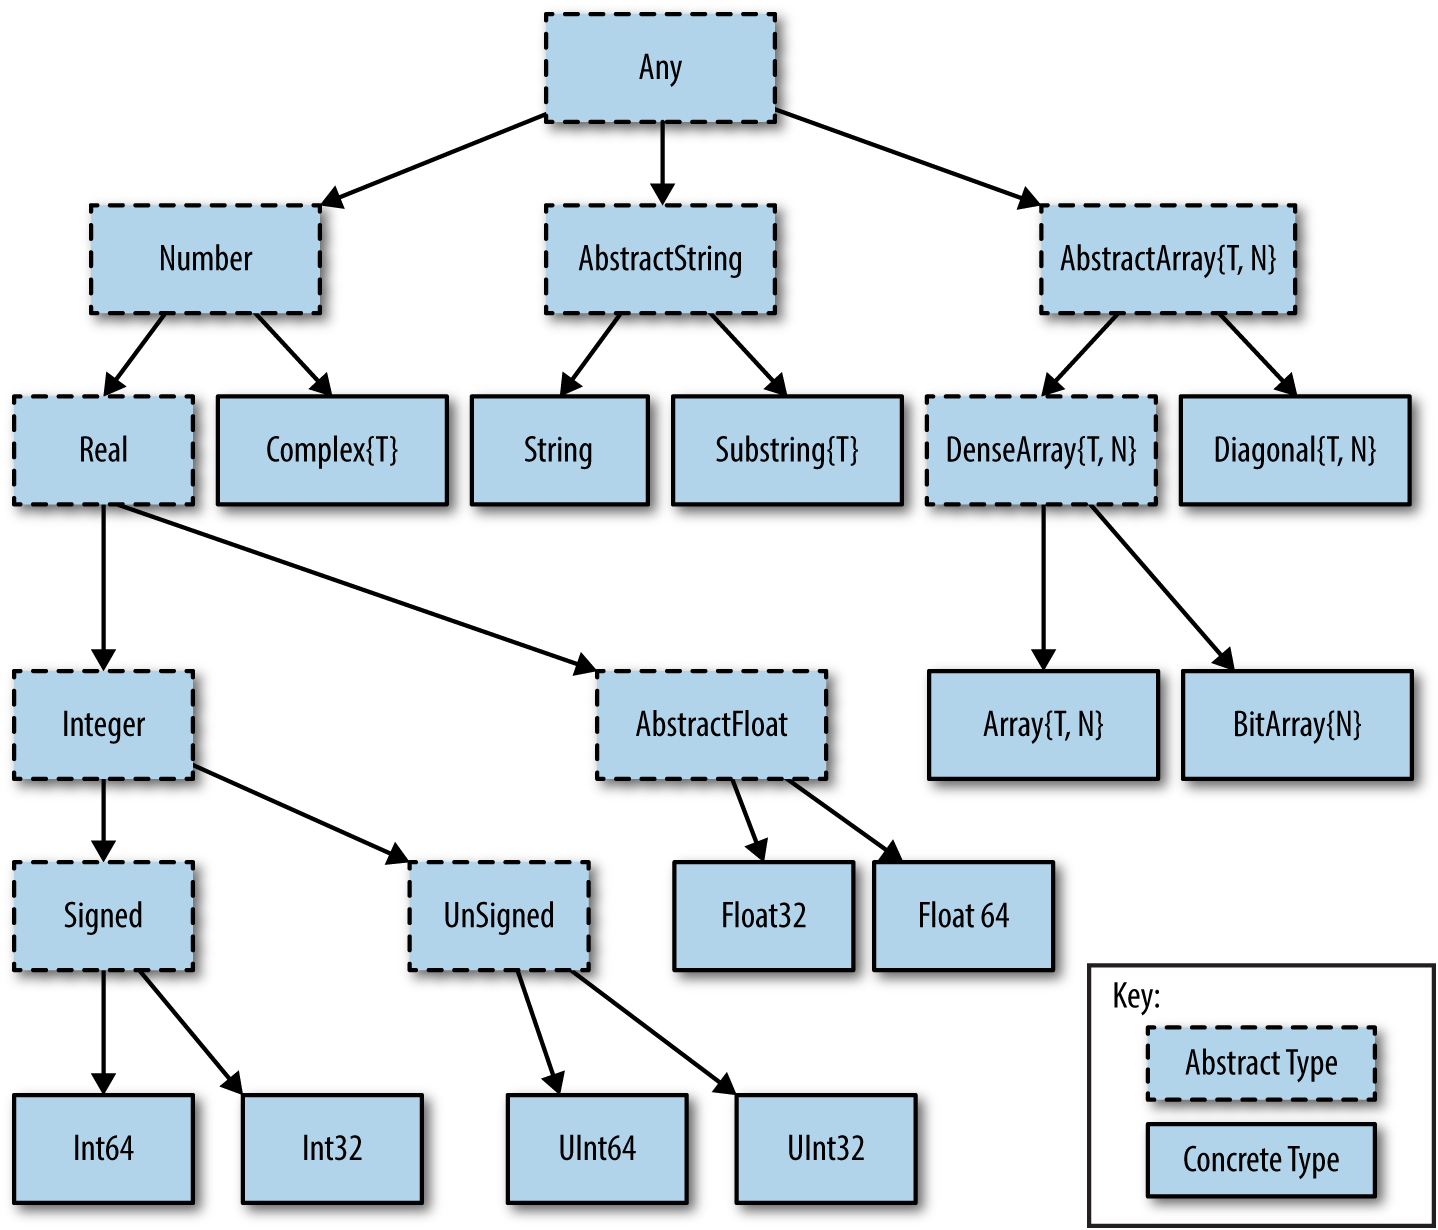
The backbone for this hierarchy are the abstract types, describing sets of concrete types.

Types are declared with the `::` operator. Type-declaration can be used similarly to statically-typed languages:

In [ ]:
y::Int8=100

In [ ]:
typeof(y)

In [ ]:
y=12.0+3im

In [ ]:
z::AbstractFloat=3.0f0
typeof(z)

In [ ]:
z=3.0; typeof(z)

We can probe the position of the type of a value in the hierarchy with the `<:` operator, which basically stands for <i> is a subtype of</i>.

In [ ]:
typeof(y)<:Integer

In [23]:
typeof(x)<:Integer

false

<div class="alert alert-block alert-success">
    <b>Exercise:</b> What are, besides <code>Any</code>, supertypes of $\alpha$?
</div>

In [40]:
typeof(α)<:Integer

true

<br>This will become very useful in the context of function definitions, as we will see in the next section.<br>
All concrete types are final, which means they may not subtype each other, which is different from typical object-oriented languages. A useful tool however are the composite types, that have analogues in many languages. The `struct` keyword defines composite types.

In [ ]:
abstract type Shapes end
struct Rectangle<:Shapes
    bottomleft::Vector{Float64}
    width
    height
end
Shapes<:Any

We defined the composite type `Rectangle` (a concrete type) to be a subtype of the class `Shapes`. As shown by the output, this custom abstract type is (exclusively) supertyped by the most general type `Any`. <br> 
When no type is declared for the elements `width` and `height`, the most general abstract type `Any` is used for these as well. A new instance of the custom type is created by calling `Rectangle` as a function:

In [ ]:
r=Rectangle([1.0,2.0],3,4)

In [ ]:
typeof(r)

The fields of this composite type can be accessed via the dot notation.

In [ ]:
r.width

The abstract type that you created can be subtyped by many structs, but each struct is a concrete type. The concept of inheritance does not exist in Julia. In the next section it will become clear why. Change the definition below so it's properly subtyped.

In [ ]:
struct Square<:Rectangle
    bottomleft::Vector{Float64}
    side
end

A very usefull tool when working with composite types is the `fieldnames` function that returns a tuple with names off all the structure fields represented as symbols.

In [ ]:
fieldnames(Rectangle)

In [ ]:
fieldnames(typeof(r))

## 2. Functions & Methods
Just like in any programming language we want to create objects that takes a tuple of argument values to return one or more outputs (also ordered in a tuple). We can create functions using the shorthand on-line notation,

In [ ]:
half(x)=x/2; half(4)

or use the long form

In [ ]:
function plus(x,y)
    x+y
end

By default, the last evaluated expression in functions is returned. The keyword `return`, although not necessary, is often used to improve readability.

In [ ]:
function plus(x,y)
    return x+y
end

Multiple values can be returned by writing them comma-seperated after the `return` keyword (or on the last line).

In [ ]:
function powers(x)
    return x,x^2,x^3,x^4
end

The output is a tuple of length `N=4`.

In [ ]:
ps=powers(3); typeof(ps)

The functions created above are dynamically typed, meaning that the types are only fixed at runtime. This way we risk running into type errors or unwanted functionalities.

In [ ]:
plus("four",3)

In [ ]:
powers("three")

We can introduce type annotations into previously untyped code for additional expressiveness.

In [ ]:
function plus(x::Number,y::Number)
    return x+y
end
plus(x,y)= throw(ArgumentError("sum is defined only for numbers"))

In [ ]:
plus("Type",3)

In [ ]:
plus(4,5.0)

We've now defined two methods for the function `plus`. When a function is called the dispatch system in Julia decides which method to use based on the number of function arguments and the argument types. Every input argument is taken into account for this choice and the most specific method is chosen. This is known as <b>multiple dispatch</b> and is a key feature of Julia that contributes to its great performance.

To find out all the methods linked to a function the `methods()` function can be called. For a user-defined function

In [ ]:
methods(plus)

Or for any standard function for that matter.

In [ ]:
methods(abs)

Now, why do we sometimes refer to Julia as <i>type-oriented</i> programming? Let's go back to the composite types (user-defined types) and combine it with multiple-dispatch. Remember the `Rectangle` type that we defined earlier.

In [ ]:
methods(Rectangle)

In [ ]:
fieldnames(Rectangle)

Let's define a function that gives us the vertices from our rectangle.

In [ ]:
function vertices(r::Rectangle)::Vector{Vector{Float64}}
    x,y = r.bottomleft
    w,h = r.width, r.height
    return [[x, y], [x+w, y], [x+w, y+h], [x, y+h]]
end
a₁,a₂,a₃,a₄=vertices(r)

The input type here is explicitly defined, because the function, as we have defined it here, only makes sense for our custom object `Rectangle`. Similarly we can define the area as

In [ ]:
area(r::Rectangle) = r.width*r.height
area(r)

Functions are defined outside of the declaration of the structure. Since Julia uses multiple-dispatch it would be inappropriate for a function to belong to a certain composite type. Because of this there is for example no inheritance, but existing methods can be changed and new ones can be added without the need to change the definition of the composite type. For example, the same object in Python would be defined as class Rectangle <br>
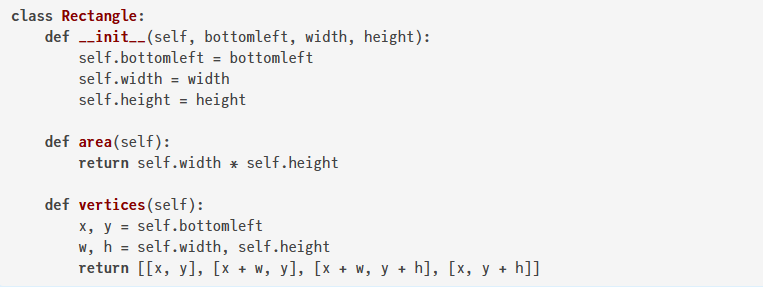
<br>or in C++<br>
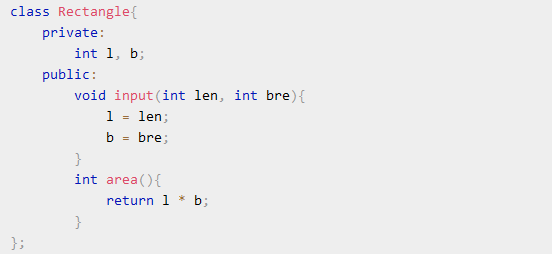

Advantages of defining functions outside the type definition are first of all an improvement of readability. Secondly, when working with composite types/classes from external packages you can simply define additional functions without the need for inheritance. And lastly when working with multiple composity types/classes it's not important that a function belongs to one class or the other.

<div class="alert alert-block alert-success">
    <b>Exercise:</b> Create a new composite type <code>Cuboid</code> for a rectangular cuboid (box/<i>balk</i>) containing <code>Real</code> numbers for the width, height and depth and the floating point coordinates of one of the vertices. Make this new type a subtype of the abstract <code>Shapes</code>.<br>
    Add a method to the function <code>area</code> for this new type and define a new function that returns the volume of this geometry.
</div>

In [ ]:
struct Cuboid<:Shapes
    width::Real
    height::Real
    depth::Real
    vertex::Vector{Float64}
end
c=Cuboid(3,1,1,[1.0,1.0,1.0])

In [ ]:
function area(c::Cuboid)
    s₁=c.width*c.height
    s₂=c.width*c.depth
    s₃=c.height*c.depth
    return 2*(s₁+s₂+s₃)
end
methods(area)

In [ ]:
Volume(c::Cuboid)=c.width*c.height*c.depth
Volume(c)

## 3. Array syntax

### a. Matrices
Crucial in any programming language are the special variables that can hold many values at a time. Similar to Python, square brackets can be used to create vectors and matrices.<br>
The array syntax is pretty similar to MATLAB. Elements in a vector are comma (or semicolon) seperated.

In [ ]:
v=[1, 2, 3, 4, 5, 6] # create a column vector

In [ ]:
w=[2.0; 4.0; 6.0]

Matrices are built row by row. Notice that here you cannot use a comma to seperate rows.

In [ ]:
M=[1 2 3; 4 5 6] # create a 2x3 matrix

In [ ]:
v=[1 2 3 4 5 6] # create a row vector

A different notation to construct arrays, that is used less frequently, would be

In [ ]:
Q=[1; 2;; 3; 4;;; 5; 6;; 7; 8] # create a 3D array

 Accessing elements of a 1D or 2D array can be done also with square brackets. Unlike Python but similar to Matlab, indexing starts at 1.

In [ ]:
v[3]

In [ ]:
v[2:5]

In [ ]:
M[1,3]

In [ ]:
M[2:4]

<br>
<br>
As you can see, the type of these data structures is set by the types of the values we put in.

In [ ]:
N=[1 2 3; 4+2.0im 5f0 6]

Elements of an array can be changed one by one

In [ ]:
v[3]=0

or all at once, using *broadcasting*

In [ ]:
v.=3

The dot syntax can be applied in combination with every basic operation.

In [ ]:
M[1,:].*=2

In [ ]:
v[1:4].+=6

In [ ]:
N[:].-=2+3im

The type of our array, once generated, remains fixed. To ensure type-stability, one can also allocate memory before defining the values of an array.

In [ ]:
a=Vector{Float64}(undef,5) # create vector of Float64's of length 5 with undefined values
B=Matrix{Int64}(undef,4,2) #create a matrix of Int64's of size 4x2
C=Array{ComplexF32}(undef,2,3,4,5) # define an 4D array of complex Float32's of size (2x3x4x5)
B

Other ways to allocate space include

In [ ]:
A=zeros(ComplexF64,3,3,3) # create a 3D array of complex numbers and fill with zeros
B=ones(1,3) # create row vector of ones
C=similar(A) # create undefined vector with same type and size as A

After creation of an array the size of these objects (and any data structure in general) can be accessed through the `size(A,dims=[])` function.

In [ ]:
s₃=size(Q,3); println(s₃)
s=size(M); println(s); 
typeof(s)

<div class="alert alert-block alert-success">
    <b>Exercise:</b> Create a matrix <code>X</code> whose elements are given by the following formula
    \begin{align}
    X_{i,j} = \frac{1}{2}\exp\{(Y_{i,j}+1)^2\}
    \end{align}
    where the matrix <code>Y</code> is given below. Use broadcasting.
</div>

In [ ]:
Y=[1.0 -1 3; 2.0 1.0 -2]
X=similar(Y)
X.=0.5*exp.((Y.+1).^2)
#or using the @. macro
@. X=0.5exp((Y+1)^2)

<br>
<br>
It is important to note that the *value* of an array is the pointer to its memory allocation.

In [ ]:
a=[1; 2; 3; 4; 5]
b=a
b[3]=10
a

Instead use `copy()` instead:

In [ ]:
a=[1;2;3;4;5]
b=copy(a)
b[3]=10
a

The exclamation mark let's us know that this is the *in-place* version. No new memory is allocated, instead `c` is overwritten.<br> 
<br>
<br> The elements of an array can be of any type. You could for example make an array of arrays:

In [ ]:
a=Vector{Vector{Float64}}(undef,3)
a[1]=[1.0; 2.0]
a[2]=ones(5)
a[3]=[2.0; 3.0; 5.0]
a

<br>
<br>
Elements (of the same type) can be added to vectors using `append!()`.

In [ ]:
v=[1, 2, 3, 4, 5, 6]
append!(v,[10])

In [ ]:
append!(v,11:15)

Appending new elements to arrays of dimension two or higher is not possible. We can however concatenate arrays using `cat(A,B,...;dims=x)` along the dimension specified by `dims` (ofcourse only when the dimensions of `A` and `B` match).

In [ ]:
A=cat(M,M;dims=2)

In [ ]:
cat(M,M;dims=1)

In [ ]:
cat(M,A;dims=2)

<br> Arrays of higher dimensionality can be created by first generating an empty array of the correct size and then filling it manually or by concatenating matrices.

<div class="alert alert-block alert-success">
<b>Exercise:</b> Create three matrices with the following properties:<br>
       1. Matrix `A` of size `2x3` and all its elements equal to `0`<br>
       2. Matrix `B` of size `2x3x2` and all its elements equal to `1`<br>
       3. Matrix `C` of size `2x3` and all its elements equal to `3`<br>
    Concatenate these three matrices along the third dimension
</div>

In [ ]:
A=zeros(2,3)

In [ ]:
B=ones(2,3,2)

In [ ]:
C=3*ones(2,3)

In [ ]:
cat(A,B,C;dims=3)

### b. Tuples


Tuples are basically immutable arrays. They can't be changed, but are very fast. They are constructed with the `(x,y,z,...)` syntax. Each element in a tuple can have a different type.

In [ ]:
tup=(2.0,3+4im,"Hello")

In [ ]:
x,y,z=tup; typeof(y)

## 4. Control flow

Julia's control flow is pretty standard. There are the standard `for`- and `while`-loops.

In [ ]:
for i ∈ 1:5
    println(i)
end

In [ ]:
t=0
while t<5
    println(t)
    t+=1 # t = t+1
end

Then there is of course also the conditional statement.

In [ ]:
x,y=1,2
if x>y
    println("value of x is larger")
elseif x<y
    println("value of y is larger")
else
    println("values are equal")
end

Through the boolean operators `&&` and `||`, Julia provides short-circuit evaluations. In a sequence of boolean expressions connected by these operators, the minimal number of expressions is evaluated.

In [ ]:
x == y && (println("values are equal"))

In [ ]:
x == y || (println("values are not equal"))

In [ ]:
!(x == y) && (println("values are not equal"))

<div class="alert alert-block alert-success">
    <b>Exercise:</b> Complete the function <code>fact(n)</code>.<br>
    Make sure that the input is a non-negative integer. Throw an error for negative and non-integer input. Use the functions <code>isinteger(x)</code> and <code>error("error message")</code>.<br>
    <b>Hints: </b> Apply your function iteratively.
</div>

In [ ]:
function fact(n)
    # some code
    if n<0 || !isinteger(n)
        error("Factorial only defined for non-negative integers")
    elseif n==0
        nfact=1
    else
        nfact = n * fact(n-1)
    end
    return nfact
end
fact(4)

In some instances you might want to stop your loop sooner or skip certain iterations. For this you could use respectively the `break` and `continue` keywords.

In [ ]:
for i ∈ 1:10
    mod(i,2)==0 && continue
    println(i)
end

In [ ]:
t=0
while t<10
    t==4 && break
    println(t)
    t+=1
end

Lastly, we introduce *ternary operator* `?`:<br>
`a ? b : c`<br>
which corresponds to "if `a` is true, run `b`; otherwise, evaluate `c`".
<div class="alert alert-block alert-success">
    <b>Exercise:</b> Rewrite the function <code>fact(n)</code> using the ternary operator
</div>

In [ ]:
function fact(n)
    isinteger(n) || error("Factorial only defined integers")
    n<0 && error("Factorial only defined for non-negative values")
    return n==0 ? nfact=1 : nfact=n*fact(n-1)
end
fact(4)

In [ ]:
function fact(n)
    n<0 && !isinteger(n) && error("Factorial only defined integers")
    return n==0 ? nfact=1 : nfact=n*fact(n-1)
end
fact(5)